In [2]:
from google.colab import files
uploaded=files.upload()

Saving Placement_task.csv to Placement_task.csv


In [3]:
import pandas as pd
data=pd.read_csv("Placement_task.csv")
data.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


Epoch0:Loss=0.693
Epoch200:Loss=0.464
Epoch400:Loss=0.446
Epoch600:Loss=0.441
Epoch800:Loss=0.438
Epoch1000:Loss=0.436
Epoch1200:Loss=0.435
Epoch1400:Loss=0.434
Epoch1600:Loss=0.434
Epoch1800:Loss=0.433
Weights: [0.25388042 0.03200116 0.24804444 0.12810635 0.4846569  0.30041339
 0.31499965 0.35393395 0.27850191 0.30333825]
Bias: -0.5374130850511789
Train prediction: [1 1 1 ... 0 0 1]
Test prediction: [0 0 0 ... 1 1 0]
Train accuracy: 0.801375
Test accuracy: 0.793


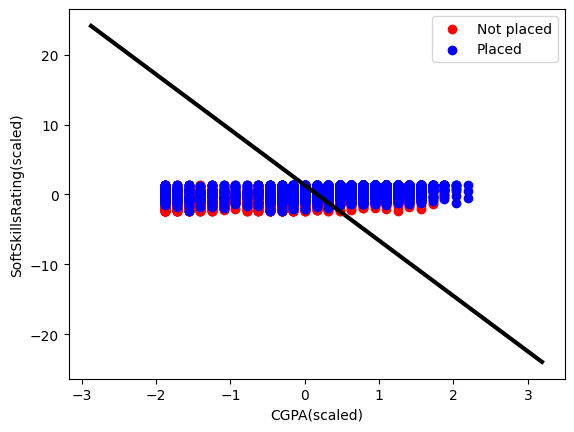

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data=pd.read_csv("Placement_task.csv")

data['ExtracurricularActivities']=data['ExtracurricularActivities'].map({'Yes':1,'No':0})
data['PlacementTraining']=data['PlacementTraining'].map({'Yes':1,'No':0})
data['PlacementStatus']=data['PlacementStatus'].map({'Placed':1,'NotPlaced':0})

X=data[['CGPA','Internships','Projects','Workshops/Certifications','AptitudeTestScore','SoftSkillsRating','ExtracurricularActivities','PlacementTraining','SSC_Marks','HSC_Marks']].values
y=data['PlacementStatus'].values


scaler=StandardScaler()
X=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def logistic_reg(X,y,lr=0.01,epochs=2000):
    m,n=X.shape;
    w=np.zeros(n)
    b=0.0
    for i in range(epochs):
        z=np.dot(X,w)+b
        y_pred=sigmoid(z)

        dw=np.dot(X.T,y_pred-y)/m
        db=np.mean(y_pred-y)

        w-=lr*dw
        b-=lr*db

        if i%200==0:
            loss=-np.mean(y*np.log(y_pred+1e-8)+(1-y)*np.log((1-y_pred+1e-8)))
            print(f"Epoch{i}:Loss={loss:.3f}")


    return w,b

w,b=logistic_reg(X_train,y_train)
print("Weights:",w)
print("Bias:",b)

def pred_val(X,w,b):
    z=np.dot(X,w)+b
    y_pred=sigmoid(z)
    return (y_pred>=0.5).astype(int)


train_preds=pred_val(X_train,w,b)
test_preds=pred_val(X_test,w,b)

print("Train prediction:",train_preds)
print("Test prediction:",test_preds)

print("Train accuracy:",np.mean(y_train==train_preds))
print("Test accuracy:",np.mean(y_test==test_preds))

X_plot=X_train[:,[0,4]]
w_plot=np.array([w[0],w[4]])

median_other=np.median(X_train[:,[1,2,3,5,6,7,8,9]],axis=0)
x1_vals=np.linspace(X_plot[:,0].min()-1,X_plot[:,0].max()+1,100)
x2_vals=[]

for x1 in x1_vals:
    z_other=median_other[0]*w[1]+median_other[1]*w[2]+median_other[2]*w[3]+median_other[3]*w[5]+median_other[4]*w[6]+median_other[5]*w[7]+median_other[6]*w[8]+median_other[7]*w[9]+b
    x2=-(w[0]*x1+z_other)/w[1]
    x2_vals.append(x2)

x2_vals=np.array(x2_vals)

plt.scatter(X_plot[y_train==0,0],X_plot[y_train==0,1],color='red',label='Not placed')
plt.scatter(X_plot[y_train==1,0],X_plot[y_train==1,1],color='blue',label='Placed')

plt.plot(x1_vals,x2_vals,color='black',linewidth=3)
plt.xlabel('CGPA(scaled)')
plt.ylabel('AptitudeTestScore(scaled)')
plt.legend()
plt.show()





Train predictions: [1 1 1 ... 0 0 1]
Test predictions: [0 0 0 ... 1 1 0]
Train accuracy: 0.800125
Test accuracy: 0.7945


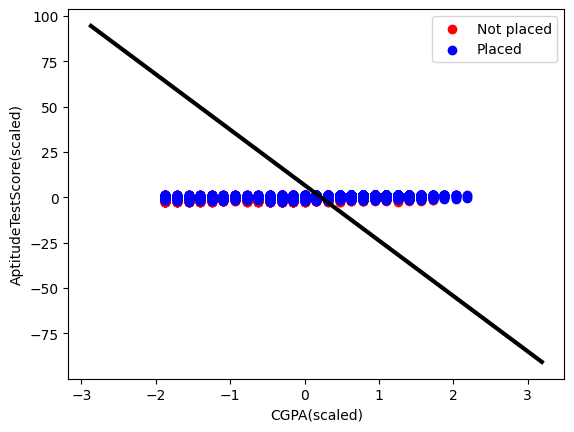

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv("Placement_task.csv")

data['ExtracurricularActivities']=data['ExtracurricularActivities'].map({'Yes':1,'No':0})
data['PlacementTraining']=data['PlacementTraining'].map({'Yes':1,'No':0})
data['PlacementStatus']=data['PlacementStatus'].map({'Placed':1,'NotPlaced':0})

X=data[['CGPA','Internships','Projects','Workshops/Certifications','AptitudeTestScore','SoftSkillsRating','ExtracurricularActivities','PlacementTraining','SSC_Marks','HSC_Marks']].values
y=data['PlacementStatus'].values

scaler=StandardScaler()
X=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=LogisticRegression()
model.fit(X_train,y_train)

train_preds=model.predict(X_train)
test_preds=model.predict(X_test)

print("Train predictions:",train_preds)
print("Test predictions:",test_preds)

print("Train accuracy:",np.mean(y_train==train_preds))
print("Test accuracy:",np.mean(y_test==test_preds))


X_plot=X_train[:,[0,4]]
median_other=np.median(X_train[:,[1,2,3,5,6,7,8,9]],axis=0)

x1_vals=np.linspace(X_plot[:,0].min()-1,X_plot[:,0].max()+1,100)
x2_vals=[]

for x1 in x1_vals:
    z_other=median_other[0]*model.coef_[0][1]+median_other[1]*model.coef_[0][2]+median_other[2]*model.coef_[0][3]+median_other[3]*model.coef_[0][5]+median_other[4]*model.coef_[0][6]+median_other[5]*model.coef_[0][7]+median_other[6]*model.coef_[0][8]+median_other[7]*model.coef_[0][9]+model.intercept_[0]
    x2=-(model.coef_[0][0]*x1+z_other)/model.coef_[0][1]
    x2_vals.append(x2)


x2_vals=np.array(x2_vals)

plt.scatter(X_plot[y_train==0,0],X_plot[y_train==0,1],color='red',label='Not placed')
plt.scatter(X_plot[y_train==1,0],X_plot[y_train==1,1],color='blue',label='Placed')

plt.plot(x1_vals,x2_vals,linewidth=3,color='black')

plt.xlabel('CGPA(scaled)')
plt.ylabel('AptitudeTestScore(scaled)')
plt.legend()
plt.show()







